<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(1234)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('./drive/MyDrive/train.csv')
test_df  = pd.read_csv('./drive/MyDrive/test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
plt.style.use('ggplot')

In [13]:
train_df[['Embarked', 'Survived','PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [14]:
train_df[['Embarked', 'Survived','PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [15]:
train_df[['Embarked', 'Survived','PassengerId']].dropna().groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [16]:
embarked_df = train_df[['Embarked', 'Survived','PassengerId']].dropna().groupby(['Embarked', 'Survived']).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

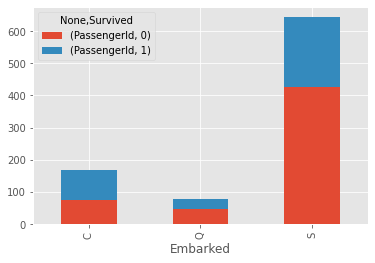

In [17]:
embarked_df.plot.bar(stacked=True)

In [18]:
embarked_df['survival_rate'] = embarked_df.iloc[:, 0] / (embarked_df.iloc[:,0]+embarked_df.iloc[:,1])

In [19]:
embarked_df

PassengerId      survival_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

In [20]:
train_df[['Sex', 'Pclass', 'Survived']]

,Sex,Pclass,Survived
0,male,3,0
1,female,1,1
2,female,3,1
3,female,1,1
4,male,3,0
...,...,...,...
886,male,2,0
887,female,1,1
888,female,3,0
889,male,1,1


In [21]:
train_df[['Sex',  'Survived', 'PassengerId']].dropna().groupby(['Sex',  'Survived']).count()

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

In [22]:
train_df[['Sex',  'Survived', 'PassengerId']].dropna().groupby(['Sex',  'Survived']).count().unstack()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

In [23]:
sex_df = train_df[['Sex',  'Survived', 'PassengerId']].dropna().groupby(['Sex',  'Survived']).count().unstack()

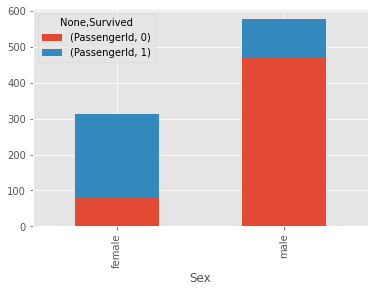

In [24]:
sex_df.plot.bar(stacked=True)

In [25]:
train_df[['Pclass', 'Survived', 'PassengerId']].dropna().groupby(['Pclass', 'Survived']).count().unstack()

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

In [26]:
ticket_df = train_df[['Pclass', 'Survived', 'PassengerId']].dropna().groupby(['Pclass', 'Survived']).count().unstack()

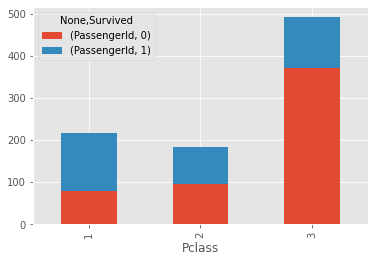

In [27]:
ticket_df.plot.bar(stacked = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


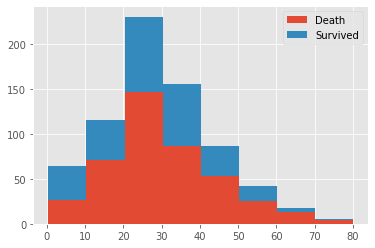

In [29]:
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived == 1]], bins=8, histtype='barstacked',  label=['Death', 'Survived'])
plt.legend()

In [32]:
train_df_corr = pd.get_dummies (train_df, columns = ['Sex'], drop_first = True)
train_df_corr = pd.get_dummies (train_df, columns = ['Embarked'])

In [33]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [34]:
train_corr = train_df_corr.corr()

In [35]:
train_corr.transpose()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,0.022148,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


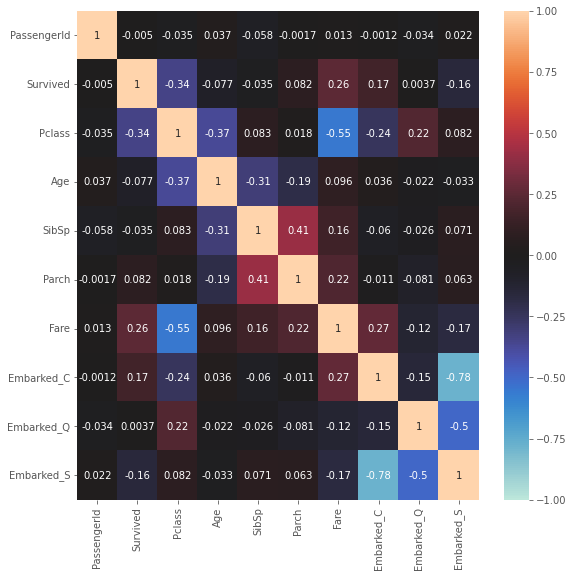

In [36]:
plt.figure(figsize = (9,9))
sns.heatmap(train_corr, vmax = 1, vmin=-1, center=0, annot=True)

In [50]:
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop=True)

In [51]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [44]:
Fare_mean = all_df[['Pclass', 'Fare']].groupby(['Pclass']).mean().reset_index()

In [46]:
Fare_mean.columns = ['Pclass', 'Fare_mean']

In [47]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [52]:
all_df = pd.merge(all_df, Fare_mean, on = 'Pclass', how='left')

In [53]:
all_df.loc [(all_df['Fare'].isnull()), 'Fare'] = all_df['Fare_mean']

In [54]:
all_df = all_df.drop('Fare_mean', axis = 1)

In [55]:
all_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [56]:
name_df = all_df['Name'].str.split('[.,]', 2, expand=True)

In [57]:
name_df.columns = ['family_name', 'honorific', 'name']

In [58]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [59]:
name_df['family_name'] = name_df['family_name'].str.strip()
name_df['honorific'] = name_df['honorific'].str.strip()
name_df['name'] = name_df['name'].str.strip()

In [60]:
name_df['honorific'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [61]:
all_df = pd.concat([all_df, name_df], axis=1)

In [62]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


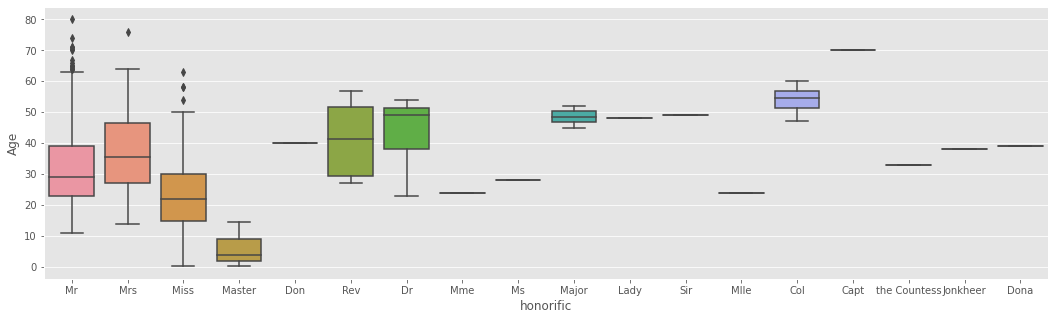

In [63]:
plt.figure(figsize=(18,5))
sns.boxplot(x='honorific', y='Age', data=all_df)

In [64]:
all_df[['Age', 'honorific']].groupby(['honorific']).mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [65]:
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)

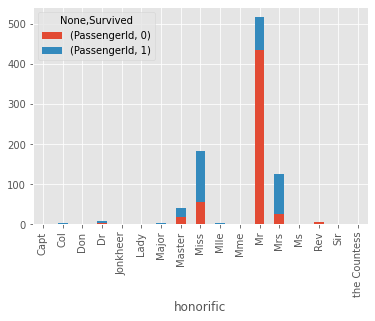

In [66]:
honorific_df = train_df[['honorific', 'Survived', 'PassengerId']].dropna().groupby(['honorific', 'Survived']).count().unstack()
honorific_df.plot.bar(stacked=True)

In [67]:
honorific_age_mean = all_df[['Age','honorific']].groupby('honorific').mean().reset_index()
honorific_age_mean.columns = ['honorific', 'honorific_Age']
all_df = pd.merge(all_df, honorific_age_mean, on='honorific', how='left')
all_df.loc[all_df['Age'].isnull(), 'Age'] = all_df['honorific_Age']

In [68]:
all_df = all_df.drop('honorific_Age', axis=1)

In [69]:
all_df['family_num'] = all_df['Parch']+all_df['SibSp']
all_df['family_num'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [70]:
all_df.loc[all_df['family_num']==0, 'alone'] = 1

In [71]:
all_df['alone'].fillna(0, inplace=True)

In [72]:
all_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_name',
       'honorific', 'name', 'family_num', 'alone'],
      dtype='object')

In [73]:
all_df = all_df.drop(['PassengerId', 'Name',  'Ticket', 'Cabin',  'family_name', 'name'], axis = 1)

In [74]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [75]:
categories = all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [76]:
all_df.loc[~((all_df['honorific']=='Mr') | (all_df['honorific']=='Miss') | (all_df['honorific']=='Mrs') | (all_df['honorific']=='Master')), 'honorific'] = 'other'

In [77]:
all_df['honorific'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [78]:
all_df.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
honorific       0
family_num      0
alone           0
dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
all_df['Embarked'].fillna('missing', inplace=True)

In [81]:
le = LabelEncoder()

for cat in categories:
  print(cat)
  all_df[cat] = le.fit_transform(all_df[cat])

Sex
Embarked
honorific


In [82]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0
1305,NaN,1,0,39.000000,0,0,108.9000,0,4,0,1.0
1306,NaN,3,1,38.500000,0,0,7.2500,2,2,0,1.0
1307,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0


In [83]:
train_X = all_df[~all_df['Survived'].isnull()].drop('Survived', axis = 1).reset_index(drop=True)
train_Y = train_df['Survived']

test_X = all_df[all_df['Survived'].isnull()].drop('Survived', axis = 1).reset_index(drop=True)

In [84]:
import lightgbm as lgb

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [86]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [87]:
categories = ['Embarked', 'Pclass', 'Sex', 'honorific', 'alone']

In [88]:
lgb_train = lgb.Dataset(X_train, Y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, Y_valid, categorical_feature=categories)

In [89]:
lgbm_params = {'objective':'binary',
               'random_seed':1234
}

In [90]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.485297
[20]	valid_0's binary_logloss: 0.439261
[30]	valid_0's binary_logloss: 0.427517
[40]	valid_0's binary_logloss: 0.444802
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.426247


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [91]:
model_lgb.feature_importance()

array([ 42,  24, 241,   1,  15, 324,  26,   6,  36,   3])

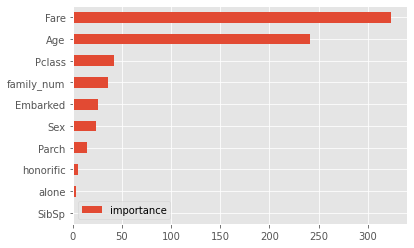

In [92]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=['importance']).sort_values(by='importance', 
                                                                                                                     ascending=True)
importance.plot.barh()

In [93]:
y_pred = model_lgb.predict(X_valid, num_interation = model_lgb.best_iteration)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(Y_valid, np.round(y_pred))

0.8324022346368715

In [118]:
lgbm_params = {'objective':'binary',
               'max_bin': 300,
               'num_leaves': 31,
               'min_data_in_leaf': 30,
               'random_seed':1234}

In [119]:
lgb_train = lgb.Dataset(X_train, Y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, Y_valid, categorical_feature=categories)

In [120]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.485714
[20]	valid_0's binary_logloss: 0.437123
[30]	valid_0's binary_logloss: 0.430615
[40]	valid_0's binary_logloss: 0.433923
[50]	valid_0's binary_logloss: 0.439873
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.430615


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [121]:
model_lgb.feature_importance()

array([ 35,  17, 160,   7,   7, 230,  22,  11,  19,   2])

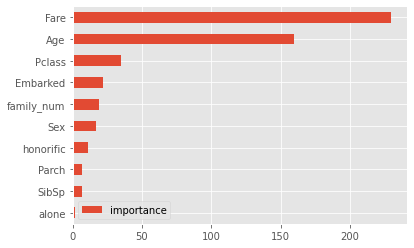

In [122]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=['importance']).sort_values(by='importance', 
                                                                                                                     ascending=True)
importance.plot.barh()

In [123]:
y_pred = model_lgb.predict(X_valid, num_interation = model_lgb.best_iteration)

In [124]:
accuracy_score(Y_valid, np.round(y_pred))

0.8268156424581006

In [125]:
folds = 3
kf = KFold(n_splits=folds)

In [127]:
models = []

for train_index, val_index in kf.split(train_X):
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index]

  lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
  lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference = lgb_train)

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets=lgb_eval,
                        num_boost_round=100,
                        early_stopping_rounds=20,
                        verbose_eval=10)
  
  y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
  print(accuracy_score(y_valid, np.round(y_pred)))
  models.append(model_lgb)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.492722
[20]	valid_0's binary_logloss: 0.469395
[30]	valid_0's binary_logloss: 0.457104
[40]	valid_0's binary_logloss: 0.462418
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.455916
0.8080808080808081
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.474663
[20]	valid_0's binary_logloss: 0.430649
[30]	valid_0's binary_logloss: 0.421502
[40]	valid_0's binary_logloss: 0.427291
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.421313
0.8148148148148148
Training until validation scores don't improve for 20 rounds.


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[10]	valid_0's binary_logloss: 0.467424
[20]	valid_0's binary_logloss: 0.407204
[30]	valid_0's binary_logloss: 0.380611
[40]	valid_0's binary_logloss: 0.372399
[50]	valid_0's binary_logloss: 0.375561
[60]	valid_0's binary_logloss: 0.378441
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.372399
0.835016835016835


In [128]:
models

In [129]:
preds = []

for model in models:
  pred = model.predict (test_X)
  preds.append(pred)

In [131]:
preds_array = np.array(preds)
preds_array

array([[0.1067936 , 0.38627952, 0.17084893, ..., 0.02839881, 0.12942042,
        0.38542373],
       [0.02383628, 0.47561868, 0.04756366, ..., 0.03778875, 0.07861089,
        0.75157255],
       [0.127722  , 0.44236912, 0.14190436, ..., 0.03992113, 0.13898625,
        0.67588644]])

In [132]:
preds_mean = np.mean(preds_array, axis=0)

In [134]:
preds_int = (preds_mean > 0.5).astype(int)

In [135]:
preds_int

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [136]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [153]:
all_df[['Pclass', 'Fare']].groupby('Pclass').describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       709.0  13.302889  11.486238  0.0   7.7500   8.0500   15.2458   69.5500

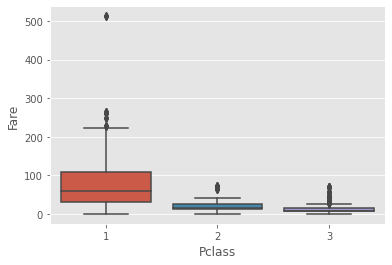

In [152]:
sns.boxplot(x='Pclass', y='Fare', data=all_df )

In [161]:
all_df['Pclass2'] = all_df['Pclass']

In [163]:
all_df.loc[all_df['Fare']>108, 'Pclass2'] = 0

In [165]:
all_df[all_df['Pclass2']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone,Pclass2
27,0.0,1,1,19.000000,3,2,263.0000,2,2,5,0.0,0
31,1.0,1,0,36.994118,1,0,146.5208,0,3,1,0.0,0
88,1.0,1,0,23.000000,3,2,263.0000,2,1,5,0.0,0
118,0.0,1,1,24.000000,0,1,247.5208,0,2,1,0.0,0
195,1.0,1,0,58.000000,0,0,146.5208,0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,NaN,1,0,31.000000,0,0,134.5000,0,1,0,1.0,0
1266,NaN,1,0,45.000000,0,0,262.3750,0,1,0,1.0,0
1291,NaN,1,0,30.000000,0,0,164.8667,2,1,0,1.0,0
1298,NaN,1,1,50.000000,1,1,211.5000,0,2,2,0.0,0


In [178]:
all_df['Embarked'].unique()

array([2, 0, 1, 3])

In [179]:
C_young10 = all_df[(all_df['Embarked']==0) & (all_df['Age']//10==1) & (all_df['family_num']==0)] 

In [180]:
len(C_young10)

7

In [181]:
C_young20 = all_df[(all_df['Embarked']==0)& (all_df['Age']//10==2)&(all_df['family_num']==0)] 

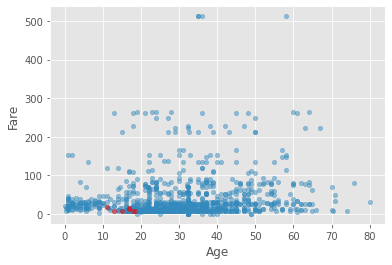

In [186]:
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young10.plot.scatter(x='Age', y='Fare', color='red', alpha = 0.5, ax=ax)

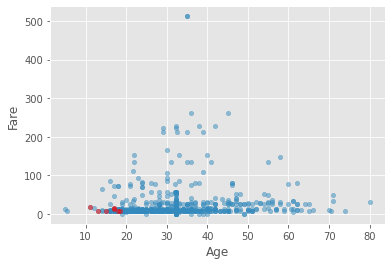

In [187]:
ax = all_df[all_df['family_num']==0].plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young10.plot.scatter(x='Age', y='Fare', color='red', alpha = 0.5, ax=ax)

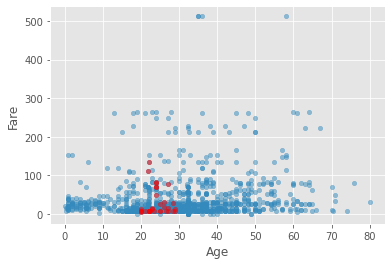

In [188]:
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young20.plot.scatter(x='Age', y='Fare', color='red', alpha = 0.5, ax=ax)

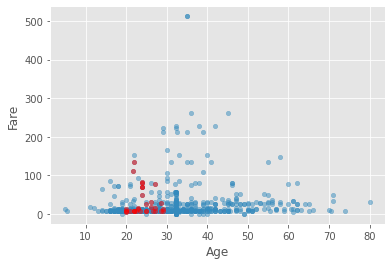

In [189]:
ax = all_df[all_df['family_num']==0].plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young20.plot.scatter(x='Age', y='Fare', color='red', alpha = 0.5, ax=ax)